In [281]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import seaborn as sn
from scipy import stats
import skfuzzy
from skfuzzy import control as ctrl
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from pyit2fls import Mamdani, IT2FS_Gaussian_UncertStd, IT2FS_plot, \
                     min_t_norm, max_s_norm, crisp
from numpy import linspace, meshgrid, zeros
from pyit2fls import IT2FS_Gaussian_UncertMean, IT2FS_plot, meet, \
                     join, min_t_norm, max_s_norm

In [282]:
class PreprocessData:
    def NomalizeData(Data):
        Data=np.array(Data)
        lenght = len(Data)
        normalizedData = []
        
        for i in range (lenght):
            normalizedData.append(float((Data[i] - min(Data) ) / ( max(Data) - min(Data)) ))
            
        return normalizedData
    
    def TestAndTrain(Data , PercentageOfTrainData):
        PercentageOfTrainData = float(PercentageOfTrainData / 100)
        Train_DataFrame = Data.sample(frac=PercentageOfTrainData)
        Test_DataFrame =Data.drop(Train_DataFrame.index)
        
        return Train_DataFrame , Test_DataFrame
    

In [283]:
Data = pd.read_excel('Detection of COVID-19 Infection from Routine Blood Exams_dataset.xlsx')
Data["SESSO"].replace({'M': 0.,'F': 1.}, inplace=True)
a = Data[Data['TARGET']==0]
Data["TARGET"].replace({2:1}, inplace=True)
Data['WBC'] = Data['WBC']*100
Data['Linfociti'] = Data['Linfociti']*100
Data['Monociti'] = Data['Monociti']*100
Data['Eosinofili'] = Data['Eosinofili']*100
Data

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,0.0,56,290.0,128.0,1.9,80.0,20.0,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,1
1,0.0,56,350.0,151.0,2.1,90.0,40.0,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,1
2,0.0,72,460.0,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,1
3,0.0,72,1650.0,316.0,14.0,120.0,30.0,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,1
4,0.0,77,490.0,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1.0,40,560.0,270.0,NaN,NaN,NaN,NaN,NaN,16.7,22.0,29.0,78.0,20.0,NaN,0
275,0.0,26,470.0,44.0,NaN,NaN,NaN,NaN,NaN,47.5,30.0,44.0,110.0,93.0,175.0,0
276,1.0,44,1570.0,356.0,NaN,NaN,NaN,NaN,NaN,2.4,31.0,17.0,NaN,NaN,272.0,0
277,1.0,41,1200.0,321.0,6.7,230.0,160.0,130.0,0.1,41.2,16.0,11.0,201.0,14.0,266.0,0


In [284]:
Data['ALT'].min()

9.0

In [285]:
def Suprimun_Tnorm(Relation, data):
    ror = np.vstack((Relation, data))
    sup_norm = np.max(np.min(ror, axis=0))
    return sup_norm


def composition(relation , data):
    composed = np.array(list(map(lambda x: list(map(lambda y: Suprimun_Tnorm(relation[x], data[y]),range(data.shape[0]))),range(relation.shape[0]))))
    return composed


def split_by_class(TrainData):
    Data0 = TrainData[TrainData['TARGET']==0]
    target0 = Data0['TARGET']
    Data0 = Data0.drop('TARGET',axis=1)
    # Data0=(Data0-Data0.min())/(Data0.max()-Data0.min())
    Data1 = TrainData[TrainData['TARGET']==1]
    target1 = Data1['TARGET']
    Data1 = Data1.drop('TARGET',axis=1)
    # Data1=(Data1-Data1.min())/(Data1.max()-Data1.min())
    Data2 = TrainData[TrainData['TARGET']==2]
    target2 = Data2['TARGET']
    Data2 = Data2.drop('TARGET',axis=1)
    # Data2=(Data2-Data2.min())/(Data2.max()-Data2.min())
    return Data0 , Data1, Data2 , target0, target1, target2 



In [286]:
#fill misiing values 
imputer= KNNImputer(n_neighbors=4)
Data = imputer.fit_transform(Data[['SESSO', 'AGE','WBC','Piastrine','Neutrofili','Linfociti','Monociti','Eosinofili','Basofili','PCR','AST','ALT','ALP','GGT','LDH','TARGET']])
Data = pd.DataFrame(Data, columns = ['SESSO', 'AGE','WBC','Piastrine','Neutrofili','Linfociti','Monociti','Eosinofili','Basofili','PCR','AST','ALT','ALP','GGT','LDH','TARGET'])
# Data = pd.concat([Data1, Data2,Data0])








In [287]:
Data

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,0.0,56.0,290.0,128.0,1.900,80.0,20.0,0.0,0.000,29.0,36.00,18.0,43.00,21.00,257.00,1.0
1,0.0,56.0,350.0,151.0,2.100,90.0,40.0,0.0,0.000,16.5,25.00,14.0,50.00,17.00,207.00,1.0
2,0.0,72.0,460.0,206.0,3.500,55.0,42.5,0.0,0.000,193.7,31.00,22.0,63.50,23.25,384.75,1.0
3,0.0,72.0,1650.0,316.0,14.000,120.0,30.0,0.0,0.000,318.7,96.00,33.0,80.00,42.00,651.00,1.0
4,0.0,77.0,490.0,198.0,3.775,67.5,42.5,0.0,0.000,34.0,35.75,24.5,85.50,91.00,330.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1.0,40.0,560.0,270.0,3.500,167.5,67.5,2.5,0.000,16.7,22.00,29.0,78.00,20.00,233.25,0.0
275,0.0,26.0,470.0,44.0,5.400,92.5,37.5,0.0,0.000,47.5,30.00,44.0,110.00,93.00,175.00,0.0
276,1.0,44.0,1570.0,356.0,13.150,125.0,137.5,2.5,0.025,2.4,31.00,17.0,90.25,43.00,272.00,0.0
277,1.0,41.0,1200.0,321.0,6.700,230.0,160.0,130.0,0.100,41.2,16.00,11.0,201.00,14.00,266.00,0.0


In [288]:
target = list(Data['TARGET'])
wbc = list(Data['WBC'])
piastrine = list(Data['Piastrine'])
noeutrofill = list(Data['Neutrofili'])
Linfociti = list(Data['Linfociti'])
Monociti = list(Data['Monociti'])
Eosinofili = list(Data['Eosinofili'])
Basofili = list(Data['Basofili'])
PCR = list(Data['PCR'])
AST = list(Data['AST'])
ALT = list(Data['ALT'])
ALP = list(Data['ALP'])
GGT = list(Data['GGT'])
LDH = list(Data['LDH'])
AGE = list(Data['AGE'])

cwbc = stats.pointbiserialr(target, wbc)
cpiastrine = stats.pointbiserialr(target, piastrine)
cnoeutrofill = stats.pointbiserialr(target, noeutrofill)
cLinfociti = stats.pointbiserialr(target, Linfociti)
cMonociti = stats.pointbiserialr(target, Monociti)
cEosinofili = stats.pointbiserialr(target, Eosinofili)
cBasofili = stats.pointbiserialr(target, Basofili)
cPCR = stats.pointbiserialr(target, PCR)
cAST = stats.pointbiserialr(target, AST)
cALT = stats.pointbiserialr(target, ALT)
cALP = stats.pointbiserialr(target, ALP)
cGGT = stats.pointbiserialr(target, GGT)
cLDH = stats.pointbiserialr(target, LDH)
cAGE = stats.pointbiserialr(target, AGE)
print('corolation wbc = ',cwbc[0],'|||||| pval wbc = ',cwbc[1])
print('corolation piastrine = ',cpiastrine[0], ' |||||| pval piastrine = ',cpiastrine[1])
print('corolaion noeutrofill = ',cnoeutrofill[0], ' |||||| pval  noeutrofill = ',cnoeutrofill[1])
print('corolation Linfociti = ',cLinfociti[0], ' |||||| pval Linfociti = ',cLinfociti[1])
print('corolation Monociti = ',cMonociti[0], '  |||||| pval Monociti = ',cMonociti[1])
print('corolation Eosinofili = ',cEosinofili[0],' |||||| pval Eosinofili = ',cEosinofili[1])
print('corolation Basofili = ',cBasofili[0], ' |||||| pval Basofili = ',cBasofili[1])
print('######corolation PCR = ',cPCR[0], ' |||||| pval PCR = ',cPCR[1])
print('######corolation AST = ',cAST[0], ' |||||| pval  AST = ',cAST[1])
print('######corolation ALT = ',cALT[0] , ' |||||| pval ALT = ',cALT[1])
print('######corolation ALP = ',cALP[0], ' |||||| pval ALP = ',cALP[1])
print('######corolation GGT = ',cGGT[0], ' |||||| pval GGT = ',cGGT[1])
print('######corolation LDH = ',cLDH[0], ' |||||| pval LDH = ',cLDH[1])
print('######corolation AGE = ',cAGE[0], ' |||||| pval AGE = ',cAGE[1])

corolation wbc =  -0.19315379527313117 |||||| pval wbc =  0.0011852460064474524
corolation piastrine =  -0.045659001525092766  |||||| pval piastrine =  0.4474769964029412
corolaion noeutrofill =  -0.1285552758421598  |||||| pval  noeutrofill =  0.031827477406032416
corolation Linfociti =  -0.3150368992014245  |||||| pval Linfociti =  7.614108248719836e-08
corolation Monociti =  -0.27498450409444375   |||||| pval Monociti =  3.120507342842616e-06
corolation Eosinofili =  -0.2040137843659165  |||||| pval Eosinofili =  0.000606854725026091
corolation Basofili =  -0.12819360199132807  |||||| pval Basofili =  0.032315901509511594
######corolation PCR =  0.21622276584480724  |||||| pval PCR =  0.00027417405438361097
######corolation AST =  0.21212250982505995  |||||| pval  AST =  0.0003598195755476327
######corolation ALT =  0.20258515992213294  |||||| pval ALT =  0.0006640400278052779
######corolation ALP =  -0.03983363355233881  |||||| pval ALP =  0.5075683393674252
######corolation GGT = 

In [289]:
# Data0 , Data1, Data2 , target0, target1, target2  = split_by_class(TrainData)
    

In [290]:
corr = Data.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/gv/29bx0dbj5fvf2ql1sq4xwxsh0000gn/T/ipykernel_9852/2020719490.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
SESSO,1.00,-0.04,-0.04,0.06,-0.08,0.20,0.05,0.09,0.03,-0.27,-0.14,-0.11,0.07,-0.07,-0.12,-0.25
AGE,-0.04,1.00,0.10,-0.17,0.14,-0.21,0.08,-0.09,-0.01,0.11,-0.00,-0.08,-0.04,-0.03,0.16,0.09
WBC,-0.04,0.10,1.00,0.41,0.96,0.16,0.66,0.18,0.54,0.26,0.17,0.07,0.14,0.09,0.35,-0.19
Piastrine,0.06,-0.17,0.41,1.00,0.36,0.14,0.31,0.25,0.31,0.09,0.03,0.15,0.18,0.20,0.13,-0.05
Neutrofili,-0.08,0.14,0.96,0.36,1.00,-0.04,0.55,0.09,0.49,0.33,0.21,0.10,0.11,0.10,0.39,-0.13
Linfociti,0.20,-0.21,0.16,0.14,-0.04,1.00,0.32,0.26,0.24,-0.33,-0.18,-0.15,0.06,-0.07,-0.25,-0.32
Monociti,0.05,0.08,0.66,0.31,0.55,0.32,1.00,0.24,0.44,-0.04,-0.07,-0.04,0.12,-0.02,-0.03,-0.27
Eosinofili,0.09,-0.09,0.18,0.25,0.09,0.26,0.24,1.00,0.42,-0.03,0.04,0.03,0.12,0.04,-0.05,-0.20
Basofili,0.03,-0.01,0.54,0.31,0.49,0.24,0.44,0.42,1.00,0.01,0.17,0.13,0.03,0.01,0.12,-0.13
PCR,-0.27,0.11,0.26,0.09,0.33,-0.33,-0.04,-0.03,0.01,1.00,0.29,0.10,0.01,0.10,0.50,0.22


In [291]:
# WBC
# Linfociti
# Monociti
# Eosinofili
# PCR
# AST
# ALT
# LDH

In [292]:
# Datasetreduced = pd.DataFrame(Data, columns = ['WBC','Linfociti','Monociti','Eosinofili','PCR','AST','ALT','LDH','TARGET'])
Datasetreduced = pd.DataFrame(Data, columns = ['WBC','Linfociti','Monociti','Eosinofili','AST','ALT','LDH','TARGET'])

Datasetreduced


,WBC,Linfociti,Monociti,Eosinofili,AST,ALT,LDH,TARGET
0,290.0,80.0,20.0,0.0,36.00,18.0,257.00,1.0
1,350.0,90.0,40.0,0.0,25.00,14.0,207.00,1.0
2,460.0,55.0,42.5,0.0,31.00,22.0,384.75,1.0
3,1650.0,120.0,30.0,0.0,96.00,33.0,651.00,1.0
4,490.0,67.5,42.5,0.0,35.75,24.5,330.00,1.0
...,...,...,...,...,...,...,...,...
274,560.0,167.5,67.5,2.5,22.00,29.0,233.25,0.0
275,470.0,92.5,37.5,0.0,30.00,44.0,175.00,0.0
276,1570.0,125.0,137.5,2.5,31.00,17.0,272.00,0.0
277,1200.0,230.0,160.0,130.0,16.00,11.0,266.00,0.0


In [293]:
#split to teset and train 
# Dataset1 = PreprocessData.NomalizeData(Data)
Dataset = PreprocessData.TestAndTrain(Datasetreduced , 80)

Datas = Dataset[0]
TestData = Dataset[1]
targetTest = TestData['TARGET']
TestData = TestData.drop('TARGET',axis=1)
# TestData=(TestData-TestData.min())/(TestData.max()-TestData.min())

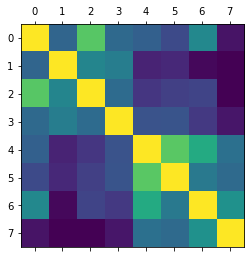

In [294]:
plt.matshow(Datas.corr())
plt.show()


In [295]:
memberships = []
fuzzyfiedsets = []

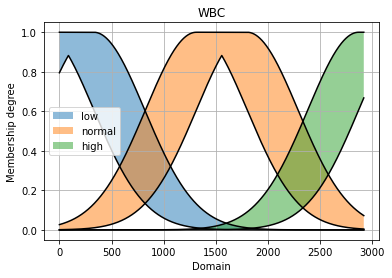

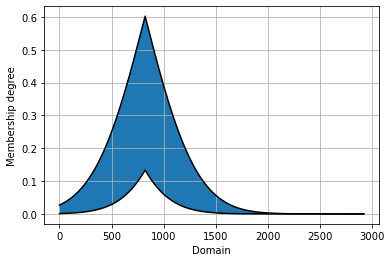

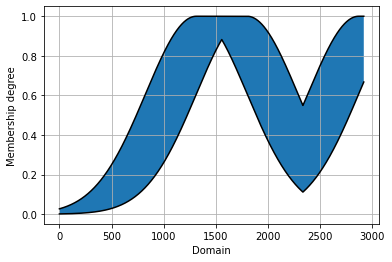

In [315]:
wbc= list(Datas['WBC'])


mean = np.mean(wbc)
std = np.std(wbc)

# Domain is defined as discrete space in the interval [0, 1] divided to 100 parts.
domain = linspace(0, max(wbc),int(max(wbc)))

A = IT2FS_Gaussian_UncertMean(domain, [0.1*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [1.8*mean, std, std, 1.])


C = IT2FS_Gaussian_UncertMean(domain, [3.6*mean, std, std, 1.])

memberships.append([A , B ,C])
IT2FS_plot(A, B, C, title="WBC", legends=["low","normal","high"], filename="multiSet")

AB = meet(domain, A, B, min_t_norm)
AB.plot(filename="meet")

BC = join(domain, B, C, max_s_norm)
BC.plot(filename="join")


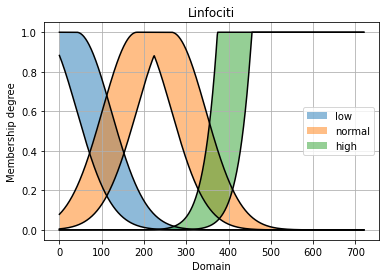

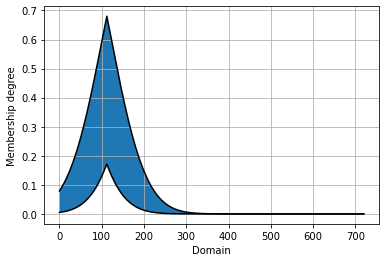

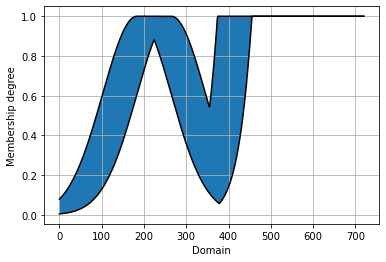

In [316]:

lnf = list(Datas['Linfociti'])

domain = linspace(0, max(lnf),int(max(lnf)))
mean = np.mean(lnf)
std = np.std(lnf)

A = IT2FS_Gaussian_UncertMean(domain, [0*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [1.8*mean, std, std, 1.])


C = IT2FS_Gaussian_UncertMean(domain, [5*mean, std, std, 26])

memberships.append([A , B ,C])
IT2FS_plot(A, B, C, title="Linfociti", legends=["low","normal","high"], filename="multiSet")

AB = meet(domain, A, B, min_t_norm)
AB.plot(filename="meet")

BC = join(domain, B, C, max_s_norm)
BC.plot(filename="join")



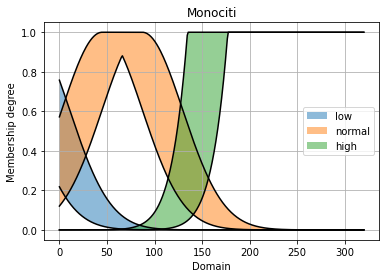

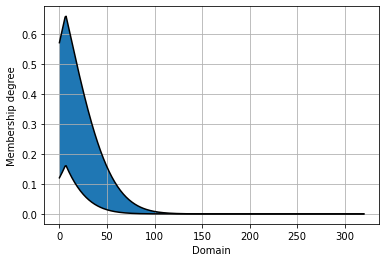

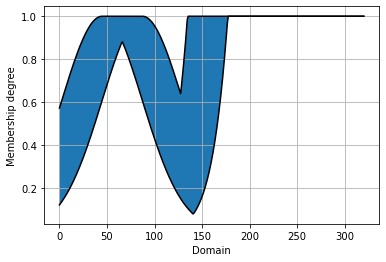

In [317]:
mnc = list(Datas['Monociti'])


domain = linspace(0, max(mnc),int(max(mnc)))
mean = np.mean(mnc)
std = np.std(mnc)

A = IT2FS_Gaussian_UncertMean(domain, [-0.8*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [mean, std, std, 1.])


C = IT2FS_Gaussian_UncertMean(domain, [4*mean, std, std, 26])

memberships.append([A , B ,C])
IT2FS_plot(A, B, C, title="Monociti", legends=["low","normal","high"], filename="multiSet")

AB = meet(domain, A, B, min_t_norm)
AB.plot(filename="meet")

BC = join(domain, B, C, max_s_norm)
BC.plot(filename="join")





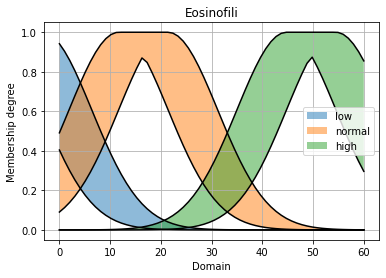

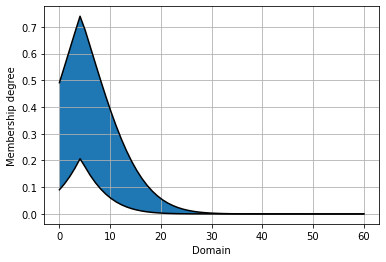

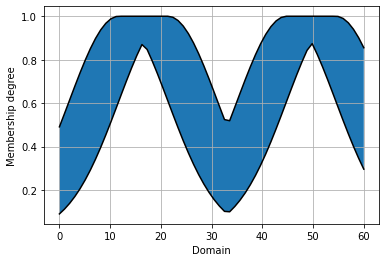

In [318]:
esnf = list(Datas['Eosinofili'])

domain = linspace(0, max(esnf),int(max(esnf)))
mean = np.mean(esnf)
std = np.std(esnf)

A = IT2FS_Gaussian_UncertMean(domain, [-1.5*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [3*mean, std, std, 1.])


C = IT2FS_Gaussian_UncertMean(domain, [9*mean, std, std, 1.])

memberships.append([A , B ,C])
IT2FS_plot(A, B, C, title="Eosinofili", legends=["low","normal","high"], filename="multiSet")

AB = meet(domain, A, B, min_t_norm)
AB.plot(filename="meet")

BC = join(domain, B, C, max_s_norm)
BC.plot(filename="join")


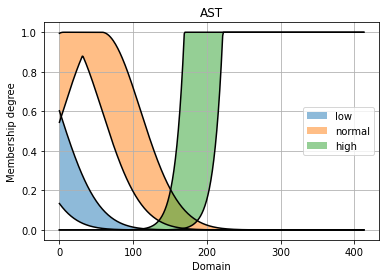

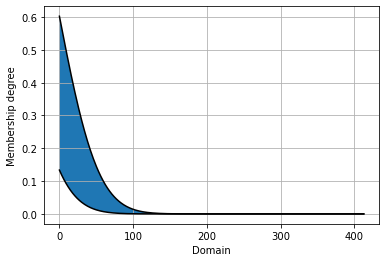

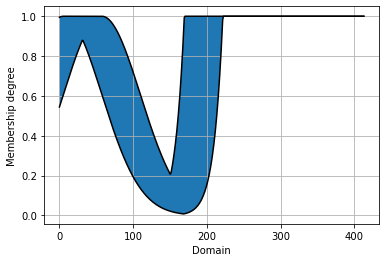

In [319]:
ast = list(Datas['AST'])


domain = linspace(0, max(ast),int(max(ast)))
mean = np.mean(ast)
std = np.std(ast)

A = IT2FS_Gaussian_UncertMean(domain, [-1.5*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [0.6*mean, std, std, 1.])


C = IT2FS_Gaussian_UncertMean(domain, [8*mean, std, std, 9999])

memberships.append([A , B ,C])
IT2FS_plot(A, B, C, title="AST", legends=["low","normal","high"], filename="multiSet")

AB = meet(domain, A, B, min_t_norm)
AB.plot(filename="meet")

BC = join(domain, B, C, max_s_norm)
BC.plot(filename="join")

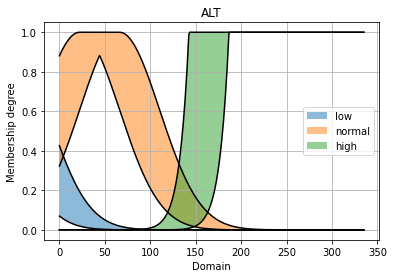

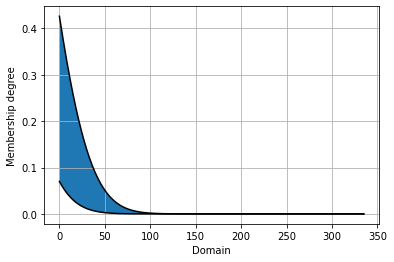

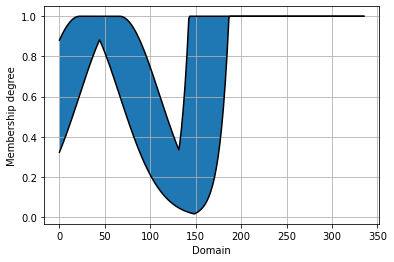

In [320]:
alt = list(Datas['ALT'])

domain = linspace(0, max(alt),int(max(alt)))
mean = np.mean(alt)
std = np.std(alt)

A = IT2FS_Gaussian_UncertMean(domain, [-1.8*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [mean, std, std, 1.])


C = IT2FS_Gaussian_UncertMean(domain, [8*mean, std, std, 9999])

memberships.append([A , B ,C])
IT2FS_plot(A, B, C, title="ALT", legends=["low","normal","high"], filename="multiSet")

AB = meet(domain, A, B, min_t_norm)
AB.plot(filename="meet")

BC = join(domain, B, C, max_s_norm)
BC.plot(filename="join")

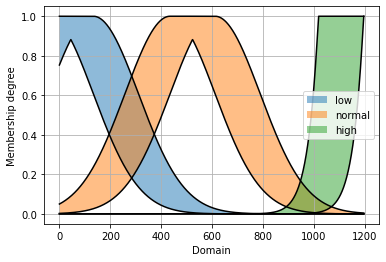

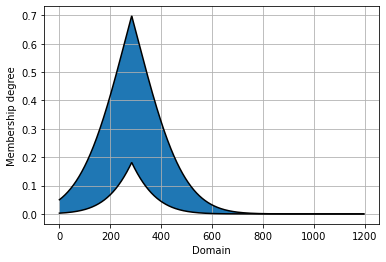

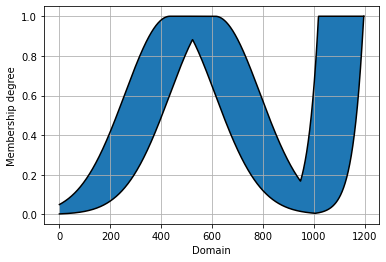

In [302]:
ldh = list(Datas['LDH'])

domain = linspace(0, max(ldh),int(max(ldh)))
mean = np.mean(ldh)
std = np.std(ldh)

A = IT2FS_Gaussian_UncertMean(domain, [0.12*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [1.4*mean, std, std, 1.])


C = IT2FS_Gaussian_UncertMean(domain, [5*mean, std, std, 9999])

memberships.append([A , B ,C])
IT2FS_plot(A, B, C, title="", legends=["low","normal","high"], filename="multiSet")

AB = meet(domain, A, B, min_t_norm)
AB.plot(filename="meet")

BC = join(domain, B, C, max_s_norm)
BC.plot(filename="join")

0.6412556053811659


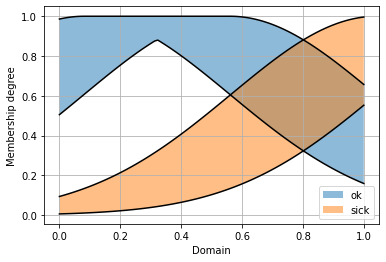

In [303]:
fuzzyfiedtarget = []

trg = list(Datas['TARGET'])



domain = linspace(0, max(trg),100)
mean = np.mean(trg)
std = np.std(trg)
print(mean)

A = IT2FS_Gaussian_UncertMean(domain, [0.5*mean, std, std, 1.])


B = IT2FS_Gaussian_UncertMean(domain, [2*mean, std, std, 1.])


memberships.append([A , B ])
IT2FS_plot(A, B,  title="", legends=["ok","sick"], filename="multiSet")



In [306]:
a = np.array(fuzzyfiedsets,dtype=object)
print(a.shape)
memberships
b = np.array(memberships,dtype=object)
print(b.shape)


(0,)
(8,)


In [314]:
myIT2FLS = Mamdani(min_t_norm, max_s_norm)
myIT2FLS.add_input_variable("x1")
myIT2FLS.add_input_variable("x2")
myIT2FLS.add_input_variable("x3")
myIT2FLS.add_input_variable("x4")
myIT2FLS.add_input_variable("x5")
myIT2FLS.add_input_variable("x6")
myIT2FLS.add_input_variable("x7")
myIT2FLS.add_output_variable("y1")
myIT2FLS.add_output_variable("y2")

myIT2FLS.add_rule([("x1", A), ("x2", B)], [("y1", C), ("y2", C)])
myIT2FLS.add_rule([("x1", A), ("x2", B)], [("y1", B), ("y2", A)])
myIT2FLS.add_rule([("x1", C), ("x2", C)], [("y1", C), ("y2", A)])

myIT2FLS.add_rule([("x1", A), ("x2", B),("x4", A), ("x5", B)], [("y1", C), ("y2", C)])
myIT2FLS.add_rule([("x1", A), ("x2", B),("x3", A), ("x4", B),("x6", A), ("x7", C)], [("y1", B), ("y2", A)])
myIT2FLS.add_rule([("x1", C), ("x2", C)], [("y1", C), ("y2", A)])


In [321]:
myIT2FLS.rules
        


[([('x1',
    Interval type 2 fuzzy set with gauss_uncert_mean_umf UMF function with [0.08081180345971414, 0.5604438019214517, 0.4796319984617376, 1.0] parameters, and gauss_uncert_mean_lmf LMF function with [0.08081180345971414, 0.5604438019214517, 0.4796319984617376, 1.0] parameters.),
   ('x2',
    Interval type 2 fuzzy set with gauss_uncert_mean_umf UMF function with [1.042695211531463, 1.5223272099932006, 0.4796319984617376, 1.0] parameters, and gauss_uncert_mean_lmf LMF function with [1.042695211531463, 1.5223272099932006, 0.4796319984617376, 1.0] parameters.)],
  [('y1',
    Interval type 2 fuzzy set with gauss_uncert_mean_umf UMF function with [1778.2489911703697, 1955.585089547119, 177.33609837674953, 9999] parameters, and gauss_uncert_mean_lmf LMF function with [1778.2489911703697, 1955.585089547119, 177.33609837674953, 9999] parameters.),
   ('y2',
    Interval type 2 fuzzy set with gauss_uncert_mean_umf UMF function with [1778.2489911703697, 1955.585089547119, 177.336098376